## Logistic Regression the Theory

Despite it's name Logistic Regression is not actually referring to regression in the sense that we covered with Linear Regression. It is a widely used **classification** algorithm. "Regression" is an historic part of the name.

Logistic regression makes use of what is know as a **binary classifier**. It utilizes the [Logistic function or Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) to predict a probability that the answer to some question is 1 or 0, yes or no, true or false, good or bad etc.. It's this function that will drive the algorithm and is also interesting in that it can be used as an "[activation function](https://en.wikipedia.org/wiki/Activation_function)" for Neural Networks. As with the posts on Linear Regression { [(1)](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-1-954/), [(2)](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-2-963/), [(3)](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-3-965/), [(4)](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-4-968/), [(5)](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-5-974/), [(6)](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-6-978/) }  Logistic Regression will be a good algorithm to dig into for understanding Machine Learning.

## Classification with Logistic Regression

 Classification algorithms do what the name suggests i.e. they train models to predict what class some object belongs to. A very common application is image classification. Given some photo, what is it? It is the success of solving that kind of problem with sophisticated deep neural networks running on GPU's that caused the big resurgence of interest in machine learning a few years ago.

 Logistic Regression is an algorithm that is relatively simple and powerful for deciding between two classes, i.e. it's a binary classifier. It basically gives a function that is a boundary between two different classes. It can be extended to handle more than two classes by a method referred to as "one-vs-all" (multinomial logistic regression or softmax regression) which is really a collection of binary classifiers that just picks out the most likely class by looking at each class individually verses everything else and then picks the class that has the highest probability.

 Examples of problems that could be addressed with Logistic Regression are,
 - Spam filtering  -- spam or not spam
 - Cell image -- cancer or normal
 - Production line part scan -- good or defective
 - Epidemiological study for illness, "symptoms" -- has it or doesn't
 - is-a-(fill in the blank) or not

You probably get the idea. It's a simple yes-or-no type of classifier. Logistic regression can make use of large numbers of features including continuous and discrete variables and non-linear features. It can be used for many kinds of problems.

## Logistic Regression Model

The first thing to understand is that this is **"supervised learning"**. The training data will be labeled data and effectively have just 2 values, that is,

$$ y \in \{0,1\}$$

$$ y = \left\{
  \begin{array}{ll} 0 & \text{The Negative Case} \\ 1 & \text{The Positive Case} \end{array} \right. $$

0 and 1 are the **labels** that are assigned to the "objects or questions" we are looking at. For example if we are looking at spam email then a message that is spam is labeled as 1. We want a model that will produce values between 0 and 1 and will interpret the value of the model as a probability of the test case being positive or negative (true or false).

$$ 0 \le h_a(x) \le 1 $$

$$ h_a(x) = P(y=1| x:a)$$

The expression above is read as **The probability that $y=1$ given the values in the feature vector $x$ parameterized by $a$.** Also, since $h$ is being interpreted as a probability the probability that $y=0$ is given by $P(y=0| x:a) = 1 - P(y=1| x:a)$ since the probabilities have to add to 1 (there are only 2 choices!).

The model (hypothesis) function $h$ looks like,

$$ \bbox[25px,border:2px solid green]{
\begin{align}
h_a(x) & = g(a'x) \\ \\
\text{Letting } z& = a'x \\ \\
h_a(x) =g(z) & = \frac{1}{1 + e^{-z}} \\ \\
\end{align} }$$

When we vectorize the model to generate algorithms we will use $X$, the augmented matrix of feature variables with a column of ones, the same as it was in the posts on linear regression. Note that when we are looking at a single input vector $x$, the first element of $x$ is set to $1$ i.e. $x_0 = 1$. This multiplies the constant term $a_0$. $h_a(x)$ and $h_a(X)$ in the case where we have $n$ features looks like,
$$ \begin{align}
h_a(x) & = \frac{1}{1+e^{-a'x}} \\ \\
h_a(x)
& = g(a_0 + a_1 x_1 + a_2 x_2 + \cdots + a_n x_n) \\ \\
h_a(X )& = g \left(
  \begin{bmatrix} 1 & x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_n
\\ 1 & x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_n
\\ \vdots & \vdots & \vdots & \ddots & \vdots
\\ 1 & x^{(m)}_1 & x^{(m)}_2 & \ldots & x^{(m)}_n \end{bmatrix}
\begin{bmatrix} a_{0} \\ a_{1} \\a_{2} \\ \vdots \\ a_{n} \end{bmatrix} \right)
\end{align}  $$

$m$ is the number of elements in the test-set.

As was the case in Linear Regression, the feature variables can be non-linear terms such as, $x_1^2, x_1x_2, \sqrt x_1 \dots $. The model itself is in the class of "[Generalized Linear Models](https://en.wikipedia.org/wiki/Generalized_linear_model)" because the parameter vector $a$ is linear with respect to the features. The logistic regression model looks like the linear regression model "wrapped" as the argument to the logistic function $g$.

**$g(z)$ is the logistic function or sigmoid function.**  Lets load up some Python modules and see what $g$ looks like.

### Sigmoid function $g(z)$


In [1]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools
%matplotlib inline
sns.set()

In [2]:
def g(z) :  # sigmoid function
    return 1/(1 + np.exp(-z))

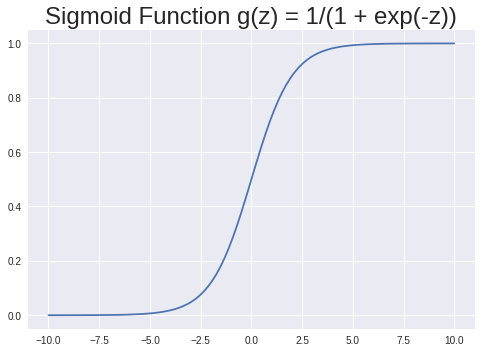

In [4]:
z = np.linspace(-10,10,100)
plt.plot(z, g(z))
plt.title("Sigmoid Function g(z) = 1/(1 + exp(-z))", fontsize=24)

There are several features of $g$ to note,
- For larger values of $z$ $g(z)$ approaches 1
- For more negative values of $z$ $g(z)$ approaches 0
- The value of $g(0) = 0.5$
- For $z \ge 0$, $g(z)\ge 0.5$
- For $z \lt 0$, $g(z)\lt 0.5$

0.5 will be the cutoff for decisions. That is, if $g(z) \ge 0.5$ then the "answer" is "the positive case", 1,  if $g(z) \lt 0.5$ then the answer is "the negative case", 0.

### Decision Boundary

The value 0.5 mentioned above creates a boundary for classification by our model (hypothesis)  $h_a(x)$

$$
\begin{align} \text{if } h_a(x) \ge 0.5 & \text{ then we say } &y=1 \\ \\
 \text{if } h_a(x) \lt 0.5 & \text{ then  } &y=0
 \end{align}  $$

 Looking at $g(z)$ more closely gives,
 $$
 \begin{align}  h_a(x) = g(a'x) \ge 0.5 & \text{ when} & a'x \ge 0 \\ \\
  h_a(x) = g(a'x) \lt 0.5 & \text{ when} & a'x \le 0
  \end{align}  $$

Therefore,
$$ \bbox[25px,border:2px solid green]{
\begin{align}  a'x \ge 0.5 & \text{ implies } & y = 1 \\ \\
 a'x \lt 0.5 & \text{ implies} & y = 0
 \end{align}  }$$

 >**The Decision Boundary is the "line" defined by $a'x$  that separates the area where $y=0$ and $y=1$.** The "line" defined by $a'x$ can be non-linear since the feature variables $x_i$ can be non-linear. The decision boundary can be any shape (curve) that fits the data. **We use a Cost Function derived from the logistic regression sigmoid function to helps us find the parameters $a$ that define the optimal decision boundary $a'x$.** After we have found the optimal values of $a$ the model function $h_a(x$), which uses the sigmoid function, will tell us which side of the decision boundary our "question" lies on based on the values of the features $x$ that we give it.

If you understand the paragraph above then you have a good idea of what logistic regression about!

 Here's some examples of what that Decision Boundary might look like;


In [5]:
# Generate 2 clusters of data
S = np.eye(2)
x1, y1 = np.random.multivariate_normal([1,1], S, 40).T
x2, y2 = np.random.multivariate_normal([-1,-1], S, 40).T

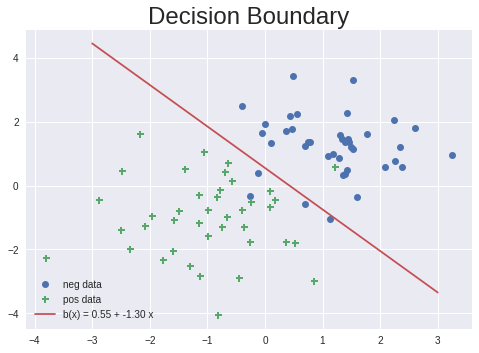

In [7]:
fig, ax = plt.subplots()
ax.plot(x1,y1, "o", label='neg data' )
ax.plot(x2,y2, "P", label='pos data')
xb = np.linspace(-3,3,100)
a = [0.55,-1.3]
ax.plot(xb, a[0] + a[1]*xb  ,  label='b(x) = %.2f + %.2f x' %(a[0], a[1]))
plt.title("Decision Boundary", fontsize=24)
plt.legend();

The plot above shows 2 sets of training-data. The positive case is represented by green '+' and the negative case by blue 'o'. The red line is the decision boundary $b(x) = 0.55 -1.3x$. Any test cases that are above the line are negative and any below are positive. The parameters for that red line would be what we could have determined from doing a Logistic Regression run on those 2 sets of training data.

The next plot shows a case where the decision boundry is more complicated. It's represented by $b(x_1,x_2) = x_1^2 +x_2^2 - 2.5$

(-5.0, 5.0, -5.0, 5.0)

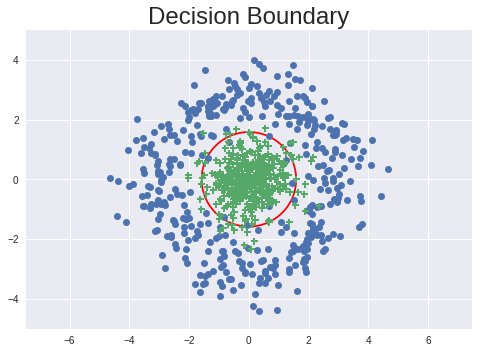

In [9]:
fig, ax = plt.subplots()
x3, y3 = np.random.multivariate_normal([0,0], [[.5,0],[0,.5]] , 400).T
t = np.linspace(0,2*np.pi,400)
ax.plot((3+x3)*np.sin(t), (3+y3)*np.cos(t), "o")
ax.plot(x3, y3, "P")

xb1 = np.linspace(-5.0, 5.0, 100)
xb2 = np.linspace(-5.0, 5.0, 100)
Xb1, Xb2 = np.meshgrid(xb1,xb2)
b = Xb1**2 + Xb2**2 - 2.5
ax.contour(Xb1,Xb2,b,[0], colors='r')
plt.title("Decision Boundary", fontsize=24)
ax.axis('equal')

In this plot the positive outcomes are in a circular region in the center of the plot. The decision boundary the red circle.


 ## Cost Function for Logistic Regression

 A cost function's main purpose is to penalize bad choices for the parameters to be optimized and reward good ones. It should be easy to minimize by having a single global minimum and not be overly sensitive to changes in its arguments. It is also nice if it is differentiable, (without difficulty) so you can find the gradient for the minimization problem. That is, it's best if it is "convex", "well behaved" and "smooth".

 The cost function for logistic regression is written with logarithmic functions. An argument for using the log form of the cost function comes from the statistical derivation of the likelihood estimation for the probabilities. With the exponential form that's is a product of probabilities and the log-likelihood is a sum. *[The statistical derivations are always interesting but usually complex. We don't really need to look at that to justify the cost function we will use.]* The log function is also a monotonically increasing function so the negative of the log is decreasing. The minimization of a function and minimizing the negative log of that function will give the same values for the parameters. The log form will also be convex which means it will have a single global minimum whereas a simple "least-squares" cost function using the sigmoid function can have multiple minimum and abrupt changes. The log form is just better behaved!

 To see some of this lets looks at a plot of the sigmoid function and the negative log of the sigmoid function.


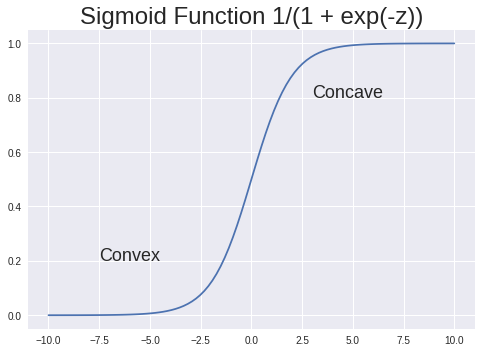

In [31]:
z = np.linspace(-10,10,100)
fig, ax = plt.subplots()
ax.plot(z, g(z)) 
ax.set_title('Sigmoid Function 1/(1 + exp(-z))', fontsize=24)
ax.annotate('Convex', (-7.5,0.2), fontsize=18 )
ax.annotate('Concave', (3,0.8), fontsize=18 )

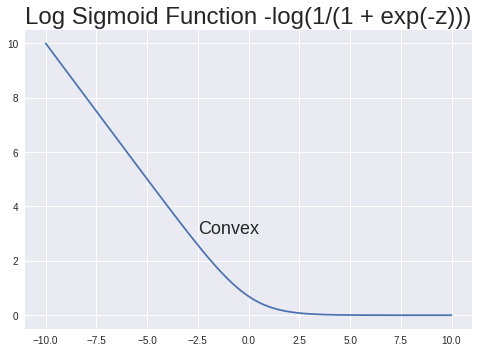

In [32]:
z = np.linspace(-10,10,100)
plt.plot(z, -np.log(g(z)))
plt.title("Log Sigmoid Function -log(1/(1 + exp(-z)))", fontsize=24)
plt.annotate('Convex', (-2.5,3), fontsize=18 )

Recall that in the training-set $y$ are labels with a values or 0 or 1. The cost function will be broken down into two cases for each data point $(i)$, one for $y=1$ and one for $y=0$. These two cases can then be combined into a single cost function $J$

$$ \bbox[25px,border:2px solid green]{
\begin{align}  J^{(i)}_{y=1}(a) & = -log(h_a(x^{(i)}))   \\ \\
 J^{(i)}_{y=0}(a) & = -log(1 - h_a(x^{(i)}))   \\ \\
 J(a) & = -\frac{1}{m}\sum^{m}_{i=1} y^{(i)} log(h_a(x^{(i)})) + (1-y^{(i)})log(1 - h_a(x^{(i)}))
 \end{align}  }$$

 You can see that the factors $y$ and $(1-y)$ effectively pick out the terms for the cases $y=1$ and $y=0$.
### Vectorized form of $J(a)$
 $J(a)$ can be written in vector form eliminating the summation sign as,
 $$ \bbox[25px,border:2px solid green]{
   \begin{align} h_a(X) &= g(Xa) \\
  J(a)  &= -\frac{1}{m} \left( y' log(h_a(X) + (1-y)'log(1 - h_a(X) \right)
   \end{align} }$$

To visualize how the cost functions works look at the following plots,


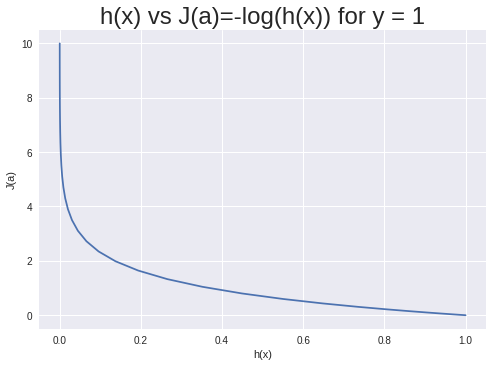

In [37]:
x = np.linspace(-10,10,50)
plt.plot(g(x), -np.log(g(x)))
plt.title("h(x) vs J(a)=-log(h(x)) for y = 1", fontsize=24)
plt.xlabel('h(x)')
plt.ylabel('J(a)')

You can see from this plot that when $y=1$ the cost $J(a)$ is large if $h(x)$ goes toward 0. That is, it favors $h(x)$ going to 1 which is what we want.

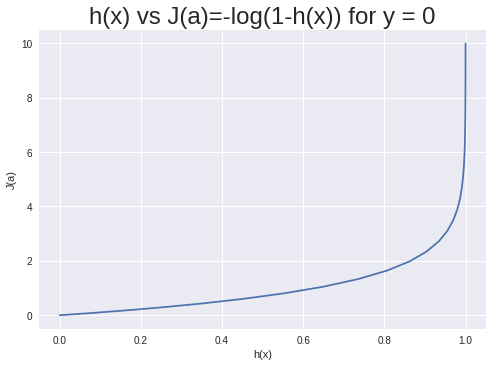

In [38]:
x = np.linspace(-10,10,50)
plt.plot(g(x), -np.log(1-g(x)))
plt.title("h(x) vs J(a)=-log(1-h(x)) for y = 0", fontsize=24)
plt.xlabel('h(x)')
plt.ylabel('J(a)')

In this plot when $y=0$ the cost $J(a)$ is large if $h(x)$ goes toward 1. It favors $h(x)$ going to 0 which is what we want for this case.

### Alternative form of $J(a)$

I'm going to "simplify" $J$ to give an alternative form that I will use to derive the gradient. The sigmoid function has some interesting properties. ($h_a(X)$ is just the sigmoid function with $z=Xa$ as a vector argument.) Here are a few useful identities,
$$ 1 - h =  1 - \frac{1}{1+e^{-z}} = \frac{e^{-z}}{1+e^{-z}} = e^{-z}h $$
That gives,
$$ \log(1-h) = \log(e^{-z}h) = \log(e^{-z})+\log(h)= -z +\log(h)$$
Using that result $J$ can be written,
$$ \begin{align}
J(a) &= -\frac{1}{m} \left( y'\log(h) + (1-y)'(\log(h) -z) \right) \\ \\
&= -\frac{1}{m} \left(\sum^m_i \log(h^{(i)}) + (y-1)'z \right)\\ \\
J(a) &= -\frac{1}{m} \left( \sum^m_i \log(h^{(i)}) + (y-1)'Xa \right)\\ \\
&= -\frac{1}{m} \left(1'\log(h) + (y-1)'Xa \right)
\end{align} $$
Note that 1' is the transpose of a vector of 1's. Multiplying a column vector by a row vector of 1's is the same as summing the terms of the column vector.

## Gradient of the Logistic Regression Cost Function
Yes, I am going to derive the gradient! (You don't get to see that very often so enjoy! I'm doing it because I can.)

I'll use the alternative expression for $J(a)$ to find the gradient $\nabla J(a)$. I'll use matrix differentials to find the gradient. The second term in $J$ is simple,
$$ d[(y-1)'Xa] = (y-1)'Xda$$
The first term is more complicated. Keeping in vector form we have,

$$ \begin{align}
d[1'\log(h)] &= (h^{-1})'dh \\ \\
&= (h^{-1})'d[(1+e^{Xa})^{-1}] \\ \\
&= (h^{-1}\odot(1+e^{Xa})^{-2}))'d[e^{-Xa}] \\ \\
&= (h^{-1}\odot h^2)'d[e^{-Xa}] \\ \\
&= h'd[e^{-Xa}] \\ \\
&= (h\odot e^{-Xa})'d[-Xa] \\ \\
&= -(1-h)'Xda
\end{align}$$

The funny looking symbol $\odot$ is the Hadamard product. It just means term-by-term vector product. I used it to keep the derivation in strictly matrix/vector form.

With those two terms derived the differential of $J$ is,

$$ \begin{align}
d[J(a)] &= -\frac{1}{m} \left((-(1-h)' - (y-1)')X\right)da  \\ \\
&= \frac{1}{m}(h-y)Xda
\end{align}$$    

Therefore,
#### The vector form of the Logistic Regression Cost Funtion is
$$ \bbox[25px,border:2px solid green]{
  \begin{align} h_a(X) &= g(Xa) \\ \\
 \nabla J(a)  &= \frac{1}{m}X'(h-y)  \\ \\
 &=\frac{1}{m}X'(g(Xa) - y)
  \end{align} }$$

Notice how similar this expression is to the gradient of the linear regression cost function,$\nabla J(a) = \frac{1}{m}X'(Xa-y)$

 **That's enough!** In the next post I'll do an implimentation of Logistic Regression in Python using these formulas and do some examples.

 **Happy computing! --dbk**
